In [1]:
# Импорт необходимых библиотек
import lasio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdp import rdp
from scipy.optimize import curve_fit
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly as py
import seaborn as sns
import plotly.figure_factory as ff

## Загрузка и парсинг исходных данных

In [4]:
wells_list_CPI = ["15_9-19 A", "15_9-19 BT2", "15_9-19 SR"]
wells_list_ASC = ["15_9-F-12", "15_9-F-14", "15_9-F-15", "15_9-F-15 A", "15_9-F-15 B", "15_9-F-15 C"]

file = "wells_for_python (Volve) Исходники/" + wells_list_CPI[0] + "/" + wells_list_CPI[0] + "_CPI.las"
las = lasio.read(file)

df = las.df()

column_drop = []
for i in df.columns:
    if i not in ["VSH"]:
        column_drop.append(i)

df = df.drop(column_drop, axis=1).dropna()
df.reset_index(inplace=True)

df = df[(df["DEPTH"] >= 3821.6223) & (df["DEPTH"] <= 3920.1707)]
df["aGR"] = 1 - df["VSH"]
df.reset_index(inplace=True)
df = df.drop("index", axis=1)

Only engine='normal' can read wrapped files


In [5]:
# Создание фрейма df_aGR

wells_list_CPI = ["15_9-19 A", "15_9-19 BT2", "15_9-19 SR"]
wells_list_ASC = ["15_9-F-12", "15_9-F-14", "15_9-F-15", "15_9-F-15 A", "15_9-F-15 B", "15_9-F-15 C"]

df_aGR = pd.DataFrame(columns=["well", "DEPTH", "VSH", "aGR"])

for well in wells_list_CPI: 
    file = "wells_for_python (Volve) Исходники/" + well + "/" + well + "_CPI.las"
    las = lasio.read(file)
    df_well = las.df()

    column_drop = []
    for i in df_well.columns:
        if i not in ["VSH"]:
            column_drop.append(i)

    df_well = df_well.drop(column_drop, axis=1).dropna()
    df_well["aGR"] = 1 - df_well["VSH"]
    df_well["well"] = well
    df_well.reset_index(inplace=True)
    
    df_aGR  = pd.concat([df_aGR, df_well])
    df_aGR.reset_index(inplace=True)
    df_aGR = df_aGR.drop("index", axis=1)
    
for well in wells_list_ASC: 
    file = "wells_for_python (Volve) Исходники/" + well + "/" + "WLC_PETRO_COMPUTED_OUTPUT_1(ASC)"
    las = lasio.read(file)
    df_well = las.df()

    column_drop = []
    for i in df_well.columns:
        if i not in ["VSH"]:
            column_drop.append(i)

    df_well = df_well.drop(column_drop, axis=1).dropna()
    df_well["aGR"] = 1 - df_well["VSH"]
    df_well["well"] = well
    df_well.reset_index(inplace=True)
    df_well["DEPTH"] = df_well["DEPT"]
    df_well = df_well.drop("DEPT", axis=1)
    
    df_aGR  = pd.concat([df_aGR, df_well])
    df_aGR.reset_index(inplace=True)
    df_aGR = df_aGR.drop("index", axis=1)
    
# df_aGR = df_aGR.drop("VSH", axis=1)

Only engine='normal' can read wrapped files
C:\Users\nik_c\AppData\Local\Temp\ipykernel_29196\3660569221.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_aGR  = pd.concat([df_aGR, df_well])


In [34]:
wells_list_CPI = ["15_9-19 A", "15_9-19 BT2", "15_9-19 SR"]
wells_list_ASC = ["15_9-F-12", "15_9-F-14", "15_9-F-15", "15_9-F-15 A", "15_9-F-15 B", "15_9-F-15 C"]

column_drop = ['* Well UWI', 'Common Well Name', '* Source', 'Rock Percent (%)', 'Original Data Source']

df_facies = pd.DataFrame(columns=['* Top Depth (meters)', '* Base Depth (meters)', 'Litho Class', 'well'])

for well in wells_list_CPI+wells_list_ASC:
    file = "wells_for_python (Volve) Исходники/" + well + "/" + well + " Facies.xlsx"
    df_well = pd.read_excel(file)
    df_well = df_well.drop(column_drop, axis=1).dropna()
    df_well.reset_index(inplace=True)
    df_well = df_well.drop("index", axis=1)
    df_well = df_well[df_well["* Litho Crv Type"] == "GENETIC FACIES"]
    df_well = df_well.drop(["* Litho Crv Type"], axis=1)
    df_well["well"] = well
    
    df_facies = pd.concat([df_facies, df_well])
    df_facies.reset_index(inplace=True)
    df_facies = df_facies.drop("index", axis=1)

# for i in df_well.columns:
#     if i not in ["* Litho Crv Type", "* Top Depth (meters)", "* Base Depth (meters)" , "Litho Class"]:
#         column_drop.append(i)

C:\Users\nik_c\AppData\Local\Temp\ipykernel_12436\2336281494.py:18: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



## Обработка исходников

In [35]:
df_facies

,* Top Depth (meters),* Base Depth (meters),Litho Class,well
0,3821.6223,3829.7642,F-TIDAL BAR,15_9-19 A
1,3829.7642,3832.4417,F-UPPER SHOREFACE,15_9-19 A
2,3832.4417,3835.6428,F-TIDAL BAR,15_9-19 A
3,3835.6428,3836.8591,F-OFFSHORE,15_9-19 A
4,3836.8591,3841.9270,F-TIDAL CHANNEL,15_9-19 A
...,...,...,...,...
106,3152.2610,3152.7625,F-TIDAL BAR,15_9-F-15 C
107,3152.7625,3155.0925,F-MOUTHBAR,15_9-F-15 C
108,3155.0925,3155.8596,F-MARSH,15_9-F-15 C
109,3155.8596,3158.7798,F-MOUTHBAR,15_9-F-15 C


In [36]:
# Присвоение кодов фаций
df_facies["facies"] = "U"

for i in range(df_facies.shape[0]):
    facie = df_facies.iloc[i][2]
    if facie == "F-TIDAL BAR":
        df_facies["facies"][i] = 5
    elif facie == "F-UPPER SHOREFACE":
        df_facies["facies"][i] = 1
    elif facie == "F-TIDAL CHANNEL":
        df_facies["facies"][i] = 6        
    elif facie == "F-MARSH":
        df_facies["facies"][i] = 7
    elif facie == "F-OFFSHORE":
        df_facies["facies"][i] = 8
    elif facie == "F-LOWER SHOREFACE":
        df_facies["facies"][i] = 2
    elif facie == "F-MOUTHBAR":
        df_facies["facies"][i] = 3

    elif facie == "F-TIDAL FLAT SANDY":
        df_facies["facies"][i] = 4
    elif facie == "F-TIDAL FLAT MUDDY":
        df_facies["facies"][i] = 9

df_facies = df_facies.drop(["Litho Class"], axis=1)    

C:\Users\nik_c\AppData\Local\Temp\ipykernel_12436\2680394408.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\nik_c\AppData\Local\Temp\ipykernel_12436\2680394408.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\nik_c\AppData\Local\Temp\ipykernel_12436\2680394408.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\nik_c\AppData\Local\Temp\ipykernel_12436\2680394408.py:5: FutureWarning:

Series.__getit

In [37]:
df_facies

,* Top Depth (meters),* Base Depth (meters),well,facies
0,3821.6223,3829.7642,15_9-19 A,5
1,3829.7642,3832.4417,15_9-19 A,1
2,3832.4417,3835.6428,15_9-19 A,5
3,3835.6428,3836.8591,15_9-19 A,8
4,3836.8591,3841.9270,15_9-19 A,6
...,...,...,...,...
106,3152.2610,3152.7625,15_9-F-15 C,5
107,3152.7625,3155.0925,15_9-F-15 C,3
108,3155.0925,3155.8596,15_9-F-15 C,7
109,3155.8596,3158.7798,15_9-F-15 C,3


Затем данные были подвержены ручной коррекции (удалены нехарактерные формы кривых, местами скорректирована разметка)

In [3]:
# Выгрузка df_facies для ручной коррекции
# df_facies.to_excel('Ручная коррекция\До коррекции\df_facies_Изначальный.xlsx')

In [ ]:
# Загрузка df_facies после ручной коррекции
df_facies = pd.read_excel('Ручная коррекция\После коррекции\df_facies_Очищенный.xlsx')
df_facies.drop(["Unnamed: 0"], axis=1, inplace=True)

In [9]:
# Выгрузка df_aGR для ручной коррекции
# df_aGR.to_excel('Ручная коррекция\До коррекции\df_aGR_2_Изначальный.xlsx')

In [4]:
# Загрузка df_aGR после ручной коррекции
df_aGR = pd.read_excel('Ручная коррекция\После коррекции\df_aGR_2_Очищенный.xlsx')
df_aGR.drop(["Unnamed: 0"], axis=1, inplace=True)

In [38]:
# Внесение кода фаций в фрейм

df_aGR["facies"] = "U"
N = 0
for i in range(df_facies.shape[0]): #df_facies.shape[0]
    
    top = df_facies.iloc[i][0]
    bottom = df_facies.iloc[i][1]
    facie = df_facies.iloc[i][3]    
    
    # df_aGR.shape[0]
    for j in range(N,df_aGR.shape[0]): #df_aGR.shape[0]
        if ((df_aGR.DEPTH[j] >= top) and (df_aGR.DEPTH[j] <= bottom) and (df_aGR.well[j] == df_facies.well[i])):
            # df_aGR.at[j,"facies"] = facie
            N+=1
            df_aGR["facies"][j] = facie
        # else:
            # df_aGR["facies"][j] = 'A'
            # print(df_aGR["facies"][j])
    # break    

C:\Users\nik_c\AppData\Local\Temp\ipykernel_12436\1602127572.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\nik_c\AppData\Local\Temp\ipykernel_12436\1602127572.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\nik_c\AppData\Local\Temp\ipykernel_12436\1602127572.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\nik_c\AppData\Local\Temp\ipykernel_12436\1602127572.py:7: FutureWarning:

Series.__getit

In [39]:
# Итоговый фрейм

df_for_i = pd.DataFrame(columns=["well", "Top", "Bottom", "aGR", "dept", 'aug', 'UWI', "Facies"])

for i in range(df_facies.shape[0]):
    
    top = df_facies.iloc[i][0]
    bottom = df_facies.iloc[i][1]
    facie = df_facies.iloc[i][3]    
    
    aGR_i = []
    dept_i = []
    # VSH_i = []
    
    for j in range(df_aGR.shape[0]):
        if df_aGR.DEPTH[j] >= top and df_aGR.DEPTH[j] <= bottom and (df_aGR.well[j] == df_facies.well[i]):           
            aGR_i.append(df_aGR["aGR"][j])
            dept_i.append(df_aGR["DEPTH"][j])
            # VSH_i.append(df_aGR["DEPTH"][j])
    if len(dept_i) > 1:
        df_for_i.loc[len(df_for_i.index)] = [df_facies["well"][i], top, bottom, np.array(aGR_i), np.array(dept_i), False, "", facie]


C:\Users\nik_c\AppData\Local\Temp\ipykernel_12436\2375397218.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\nik_c\AppData\Local\Temp\ipykernel_12436\2375397218.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\nik_c\AppData\Local\Temp\ipykernel_12436\2375397218.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\nik_c\AppData\Local\Temp\ipykernel_12436\2375397218.py:7: FutureWarning:

Series.__getit

Удалим малочисленные фации

In [40]:
# df_for_i[df_for_i['Facies'].isin(['U'])]

,well,Top,Bottom,aGR,dept,aug,UWI,Facies


In [41]:
df_for_i = df_for_i[(df_for_i['Facies'] != 'U')] 
df_for_i.reset_index(inplace=True) 
df_for_i.drop(["index"], axis=1, inplace=True)

In [42]:
df_for_i

,well,Top,Bottom,aGR,dept,aug,UWI,Facies
0,15_9-19 A,3821.6223,3829.7642,"[0.85732, 0.881874, 0.869272, 0.889534, 0.8733...","[3821.7348, 3821.8872, 3822.0396, 3822.192, 38...",False,,5
1,15_9-19 A,3829.7642,3832.4417,"[0.915544, 0.942825, 0.976087, 0.947757, 0.954...","[3829.812, 3829.9644, 3830.1168, 3830.2692, 38...",False,,1
2,15_9-19 A,3832.4417,3835.6428,"[0.801476, 0.835583, 0.863476, 0.87668, 0.8965...","[3832.5552, 3832.7076, 3832.86, 3833.0124, 383...",False,,5
3,15_9-19 A,3835.6428,3836.8591,"[0.7053400000000001, 0.695243, 0.631651, 0.628...","[3835.7556, 3835.908, 3836.0604, 3836.2128, 38...",False,,8
4,15_9-19 A,3836.8591,3841.9270,"[0.889049, 0.860039, 0.8430489999999999, 0.852...","[3836.9748, 3837.1272, 3837.2796, 3837.432, 38...",False,,6
...,...,...,...,...,...,...,...,...
105,15_9-F-15 C,3152.2610,3152.7625,"[0.727699995, 0.7548999935, 0.7789999992]","[3152.394, 3152.5464, 3152.6988]",False,,5
106,15_9-F-15 C,3152.7625,3155.0925,"[0.8067000061, 0.8213, 0.8231000006, 0.8159999...","[3152.8512, 3153.0036, 3153.156, 3153.3084, 31...",False,,3
107,15_9-F-15 C,3155.0925,3155.8596,"[0.6468999982, 0.5342999995, 0.489899992899999...","[3155.1372, 3155.2896, 3155.442, 3155.5944, 31...",False,,7
108,15_9-F-15 C,3155.8596,3158.7798,"[0.8129999936, 0.8463999927, 0.8540000021, 0.8...","[3155.8992, 3156.0516, 3156.204, 3156.3564, 31...",False,,3


Сохраним в pkl

In [16]:
# df_for_i.to_pickle(r"C:\Users\nik_c\OneDrive\Рабочий стол\Учеба\Research Project\Прогнозирование фаций\Работа\Файлы в работе\output_Excel\df_for_i_Очищенный_2.pkl")

Симлификация

In [52]:
def curve_s(x,y,eps):
    '''фун-я симплифицирует кривую с указанным параметром эпсилон'''
    x = x.tolist()
    y = y.tolist()
    curve,a,b = [],[],[]    
    for k in range (len(x)):
        a = x[k]
        b = y[k]
        curve.append([a,b])        
    simple_x = pd.DataFrame(rdp(np.array(curve),epsilon=eps),columns=['x_gr','y_gr']).iloc[:,0].tolist()
    simple_y = pd.DataFrame(rdp(np.array(curve),epsilon=eps),columns=['x_gr','y_gr']).iloc[:,1].tolist()
    return (simple_x,simple_y)

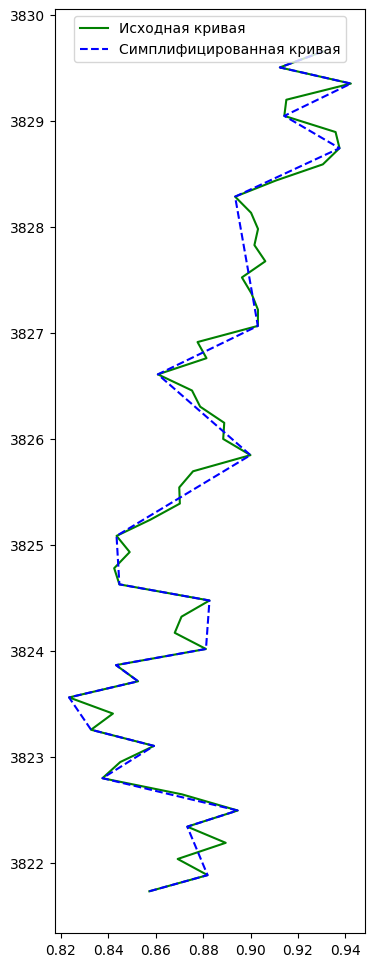

In [74]:
alpha_x_gis = df_for_i["aGR"][0] 
y_gis = df_for_i["dept"][0]     
s = curve_s(df_for_i["aGR"][0], df_for_i["dept"][0],0.014)

plt.figure(
    figsize=(4, 12)
    )

plt.plot(alpha_x_gis, y_gis, "green", alpha=1, 
        #  linestyle='--', 
         label="Исходная кривая")
plt.plot(s[0], s[1], "blue", alpha=1, label="Симплифицированная кривая", linestyle='--')
# plt.title(f"Коэффициент взаимной корреляции: {similarity}")
plt.legend(loc = 9)

In [77]:
# Симплификация

df_for_i["simple_aGR"] = "U"
df_for_i["simple_dept"] = "U"

for i in range(df_for_i.shape[0]):
    s = curve_s(df_for_i["aGR"][i], df_for_i["dept"][i],0.014)
    df_for_i["simple_aGR"][i] = s[0]
    df_for_i["simple_dept"][i] = s[1]

In [18]:
wells_name = wells_list_CPI + wells_list_ASC
wells_name

['15_9-19 A',
 '15_9-19 BT2',
 '15_9-19 SR',
 '15_9-F-12',
 '15_9-F-14',
 '15_9-F-15',
 '15_9-F-15 A',
 '15_9-F-15 B',
 '15_9-F-15 C']

## Визуализация по скважинам

In [ ]:
for wells in wells_name: # Перебираем массив названий скважин

        Filtered_Df  = df_for_i[df_for_i['well'].isin([wells])] # Создаем отфильтрованный фрейм с одной скважиной
        # & ((df_for_i['facies'] == 6) | (df_for_i['facies'] == 7) | (df_for_i['facies'] == 8))
        Filtered_Df.reset_index(inplace=True) 

        # Filtered_Well  = df_aGR[df_aGR['well'].isin([wells])] # Создаем отфильтрованный фрейм с одной скважиной
        # Filtered_Well.reset_index(inplace=True) 


        fig = make_subplots(rows=1, cols=3,
                        subplot_titles=(
                                        "aGR",
                                        "simple_aGR",
                                        "facies")
                       )

        for i in range(Filtered_Df.shape[0]): # Перебираем построчно интервалы фаций


# Отрисовка кривых

                fig.add_trace(
                        go.Scatter(x = Filtered_Df["aGR"][i],
                                y = Filtered_Df["dept"][i],
                                #name=('eps = '+str(epsl[i])),
                                name = 'aGR '+str(df_for_i["well"]),
                                line=dict(width=3,color = 'green')),
                        row=1, col=1,
                )

                fig.add_trace(
                        go.Scatter(x = Filtered_Df["simple_aGR"][i],
                                y = Filtered_Df["simple_dept"][i],
                                #name=('eps = '+str(epsl[i])),
                                name = 'simple_aGR '+str(df_for_i["well"]),
                                line=dict(width=3,color = 'blue')),
                        row=1, col=2,
                )

                # fig.add_trace(
                #         go.Scatter(x = df_for_i["facies_i"][i],
                #                 y = df_for_i["DEPT"][i],
                #                 #name=('eps = '+str(epsl[i])),
                #                 name = 'simple_aGR '+str(df_for_i["well"]),
                #                 line=dict(width=3,color = 'black')),
                #         row=1, col=3,
                # )


                Filtered_Well  = df_aGR[df_aGR['well'].isin([wells])] # Создаем отфильтрованный фрейм с одной скважиной
                #  & ((df_aGR['facies'] == 6) | (df_aGR['facies'] == 7) | (df_aGR['facies'] == 8))
                Filtered_Well.reset_index(inplace=True) 

                min = np.min(Filtered_Df["dept"][i])
                max = np.max(Filtered_Df["dept"][i])

                for j in range(Filtered_Well.shape[0]):
                        if (Filtered_Well["DEPTH"][j] <= min) or (Filtered_Well["DEPTH"][j] >= max): #  or (Filtered_Well["DEPTH"][i] >= max)
                                Filtered_Well["DEPTH"][j] = ''

                Filtered_Well['DEPTH'].replace('', np.nan, inplace=True)
                Filtered_Well.dropna(axis=0, how='any', inplace= True)
                Filtered_Well.reset_index(inplace=True) 


        # Отрисовка границ фаций
                fig.add_trace(
                go.Scatter(x = (Filtered_Well["facies"]),
                        y = (Filtered_Well["DEPTH"]),
                        #name=('eps = '+str(epsl[i])),
                        # name = 'simple_aGR '+str(df_for_i["well"]),
                        line=dict(width=3,color = 'black')),
                row=1, col=3,
                )

                # fig.add_trace(
                #         go.Scatter(x = Filtered_Df["facies"][i],
                #                 y = Filtered_Df["DEPT"][i],
                #                 #name=('eps = '+str(epsl[i])),
                #                 name = 'simple_aGR '+str(Filtered_Df["well"]),
                #                 line=dict(width=3,color = 'black')),
                #         row=1, col=4,
                # )

# Отрисовка кровли

                # аГК
                fig.add_trace(
                go.Scatter(x  = [0,1],  
                y = [Filtered_Df["dept"][i][0],Filtered_Df["dept"][i][0]], # Индекс первого значения по глубине - 0
                # name = 'top',
                #visible='legendonly',
                line=dict(color='black', width=1, dash='dot')),
                row=1, col=1
                )

                # Симпл
                fig.add_trace(
                go.Scatter(x  = [0,1],  
                y = [Filtered_Df["dept"][i][0],Filtered_Df["dept"][i][0]], # Индекс первого значения по глубине - 0
                # name = 'top',
                #visible='legendonly',
                line=dict(color='black', width=1, dash='dot')),
                row=1, col=2
                )
# Отрисовка подошвы      

                # аГК
                fig.add_trace(
                go.Scatter(x  = [0,1], # Размах значений ГК по оси x
                        #    x  = [max(Filtered_Df["GR"][i]),min(Filtered_Df["GR"][i])]
                y = [Filtered_Df["dept"][i][len(Filtered_Df["dept"][i])-1],Filtered_Df["dept"][i][len(Filtered_Df["dept"][i])-1]], # Индекс последнего значения по глубине 
                                                                                                                                   #- len(Filtered_Df["DEPT"][i])-1
                # name = 'top',
                # visible='legendonly',
                line=dict(color='black', width=1, dash='dot')),
                row=1, col=1
                )     

                # Симпл
                fig.add_trace(
                go.Scatter(x  = [0,1], # Размах значений ГК по оси x
                        #    x  = [max(Filtered_Df["GR"][i]),min(Filtered_Df["GR"][i])]
                y = [Filtered_Df["dept"][i][len(Filtered_Df["dept"][i])-1],Filtered_Df["dept"][i][len(Filtered_Df["dept"][i])-1]], # Индекс последнего значения по глубине 
                                                                                                                                   #- len(Filtered_Df["DEPT"][i])-1
                # name = 'top',
                # visible='legendonly',
                line=dict(color='black', width=1, dash='dot')),
                row=1, col=2
                )     
        fig.update_yaxes(autorange="reversed")
        fig.update_xaxes(autorange="reversed")
        fig.update_layout(title = f'Скважина {wells}',      
        height=1000,
        width=800, #1200
        showlegend=False)
        fig.show()
        # py.offline.plot(fig, filename=str(wells)+ 'Очищенные'+'.html')

## Гистограммы количества фаций

In [113]:
#определение кол-ва фаций во всех скважинах

amount_facies = {1 : 0, 2 : 0, 3 : 0, 5 : 0, 6 : 0, 7 : 0, 8 : 0, 4 : 0, 9 : 0}
# amount_facies = {1 : 0, 2 : 0, 3 : 0, 5 : 0, 6 : 0, 7 : 0, 8 : 0}

for i in range(1, df_features.shape[0]):
    n = df_features["code"][i]
    if n == 1.0:
        amount_facies[1] += 1  
    elif n == 2.0:
        amount_facies[2] += 1  
    elif n == 3.0:
        amount_facies[3] += 1                  
    elif n == 5.0:
        amount_facies[5] += 1  
    elif n == 6.0:
        amount_facies[6] += 1
    elif n == 7.0:
        amount_facies[7] += 1  
    elif n == 8.0:
        amount_facies[8] += 1  
    elif n == 4.0:
        amount_facies[4] += 1 
    elif n == 9.0:
        amount_facies[9] += 1 

amount_facies 

{1: 10, 2: 13, 3: 21, 5: 26, 6: 18, 7: 9, 8: 7, 4: 1, 9: 3}

In [116]:
amount_facies_2 = {1: 10, 2: 13, 3: 21, 5: 26, 6: 18, 7: 9, 8: 7, 9: 3, 10: 1} #  До  удаления Флэтов и чистки

In [120]:
code_facies = {5 : "Приливно-отливный\nбар\n(Tidal Bar)", 
               3 : "Устьевой бар\n(Mouthbar)",
               6 : "Дельтовый канал\n(Tidal Channel)", 
               2 : "Нижняя\nпредфронтальная\nзона пляжа\n(Lower Shoreface)", 
               1 : "Верхняя\nпредфронтальная\nзона пляжа\n(Upper Shoreface)", 
               7 : "Приморские болота\n(Marsh)", 
               8 : "Открытое море\n(Offshore)",
               9 : "Приливная равнина\nглинистая\n(Tidal flat muddy)",
               10 : "Приливная равнина\nпесчаная\n(Tidal flat sandy)" } 

Text(0.5, 1.0, 'Dataset Volve')

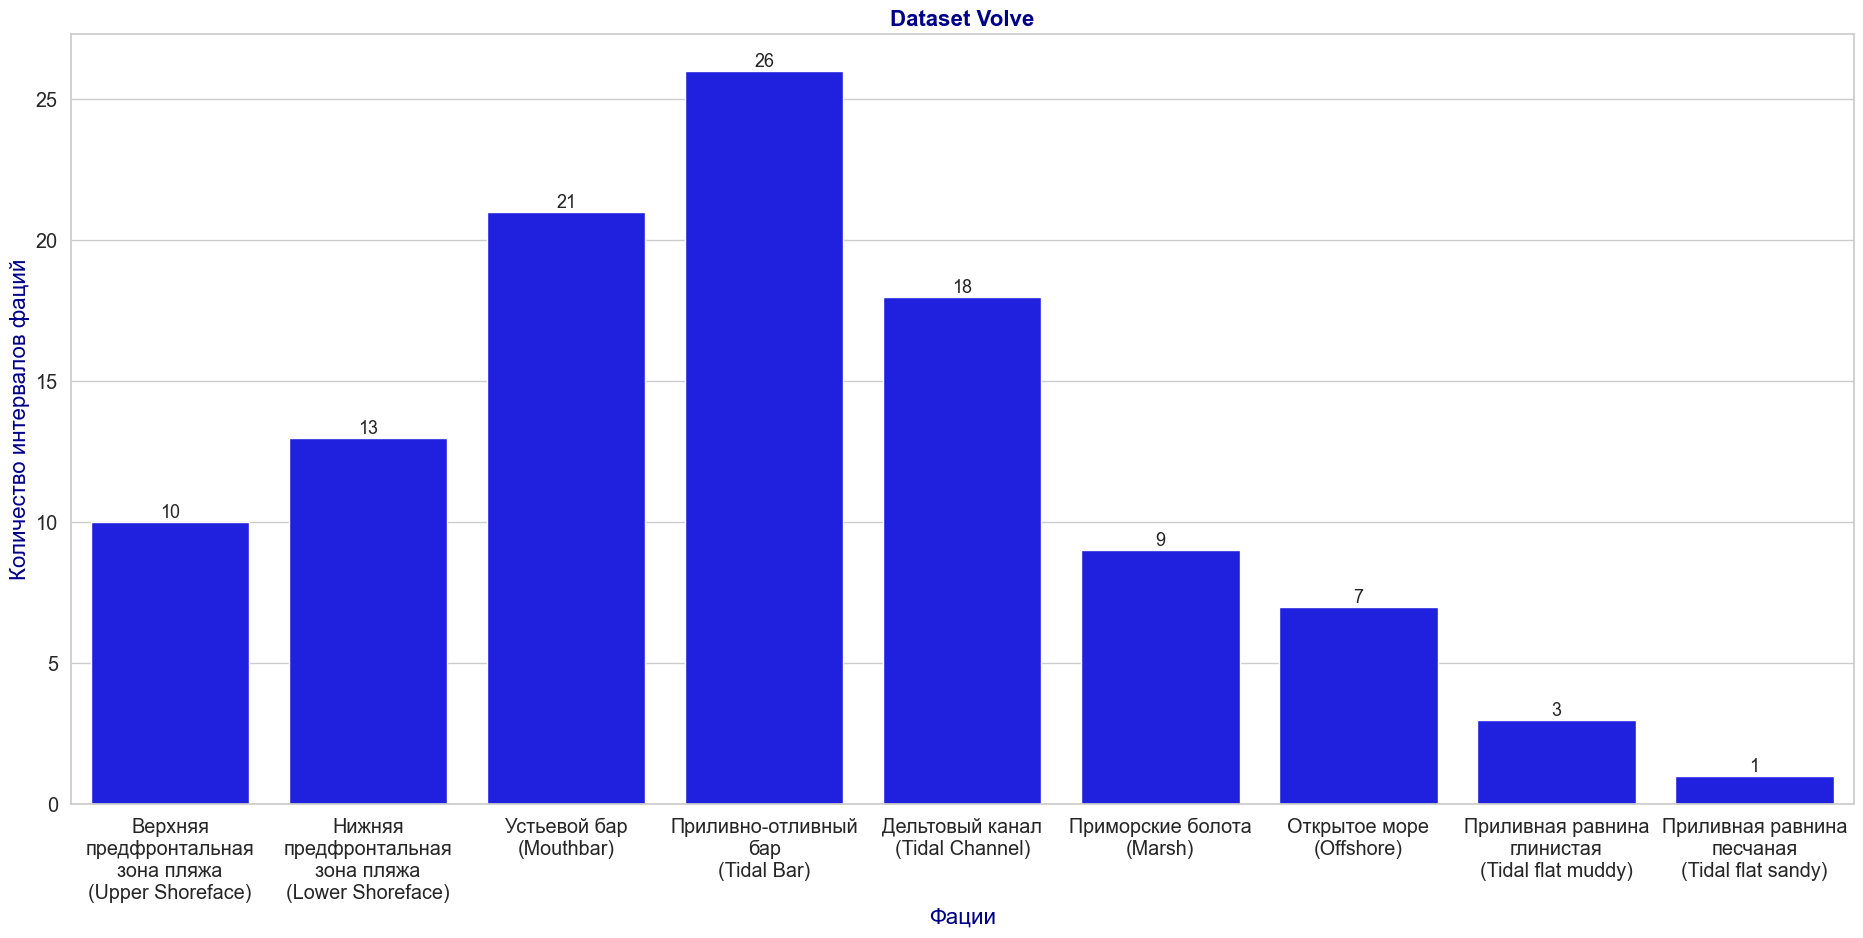

In [126]:
facies_for_bar = amount_facies_2.copy()

for key in range(11):
    if key in code_facies.keys():
        facies_for_bar[str(code_facies[key])] = facies_for_bar.pop(key)

x = list(facies_for_bar.keys())
y = list(facies_for_bar.values())

with sns.axes_style("whitegrid"):
    ax = sns.barplot(x=x, y=y, color="blue")

# sns.set(font_scale=0.5)
sns.set_theme(rc={'figure.figsize':(16,8)}, style = "darkgrid")
sns.set_context("notebook", font_scale=1.3)
ax.bar_label(ax.containers[0], fontsize=13)

ax.set_xlabel("Фации", fontsize=16, color="darkblue")
ax.set_ylabel("Количество интервалов фаций", fontsize=16, color="darkblue")
ax.set_title("Dataset Volve", fontsize=16, color="darkblue", weight="bold")